In [119]:
# Aditya EDA for Machine Learning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv("ToyotaCorolla.csv")



# New Section

In [120]:
df.head(19)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
6,7,?TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,1,0,0,1,1,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
8,9,?TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
9,10,?TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,0,1,0,0,0,1,0,0,0


In [121]:
df.tail(30)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1406,1413,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,8950,70,11,1998,44850,Petrol,110,1,...,0,0,1,0,0,1,1,0,0,0
1407,1414,TOYOTA Corolla 1.6 GL LB 4/5-Doors,8250,69,12,1998,44826,Petrol,110,0,...,1,1,1,0,0,0,1,0,0,1
1408,1415,TOYOTA Corolla 1.6 16V HATCHB GTSI 2/3-Doors,9250,80,1,1998,44444,Petrol,110,1,...,1,1,1,0,1,1,1,1,0,0
1409,1416,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...,7900,75,6,1998,43720,Petrol,110,1,...,0,0,1,0,0,1,1,0,0,1
1410,1417,TOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-D...,8500,78,3,1998,43622,Petrol,86,1,...,1,0,1,0,0,0,0,0,0,0
1411,1418,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...,7950,76,5,1998,43532,Petrol,110,0,...,0,0,1,0,0,0,1,0,0,0
1412,1419,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,9950,69,12,1998,42800,Petrol,110,1,...,0,0,1,0,0,1,1,0,0,0
1413,1420,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA AUT4 ...,8750,74,7,1998,42317,Petrol,107,1,...,1,0,1,1,1,0,1,0,1,1
1414,1421,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,7500,80,1,1998,42186,Petrol,110,1,...,0,0,1,0,1,0,1,0,0,1
1415,1422,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,6950,72,9,1998,42000,Petrol,110,1,...,0,0,1,0,0,1,1,0,0,0


In [122]:
df.isnull().sum()


,0
Id,0
Model,0
Price,0
Age_08_04,0
Mfg_Month,0
Mfg_Year,0
KM,0
Fuel_Type,0
HP,0
Met_Color,0


In [123]:
df.dropna(inplace=True)

df.describe()


,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [124]:
df["Fuel_Type"].fillna(df["Fuel_Type"].mode()[0], inplace=True)


<ipython-input-124-23c2db20f65b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fuel_Type"].fillna(df["Fuel_Type"].mode()[0], inplace=True)


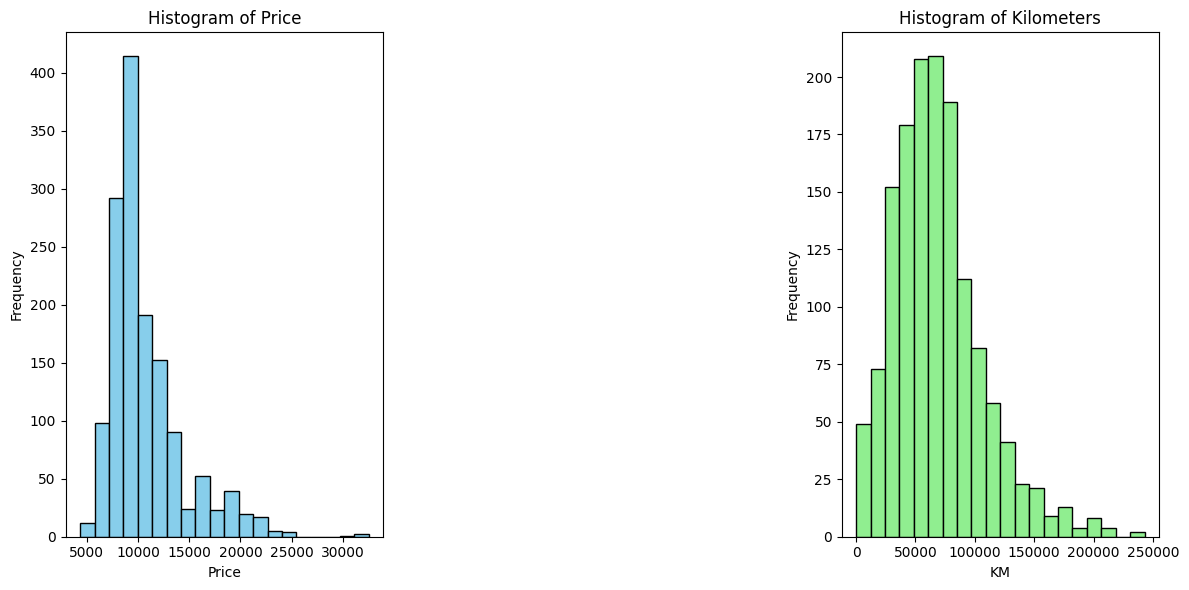

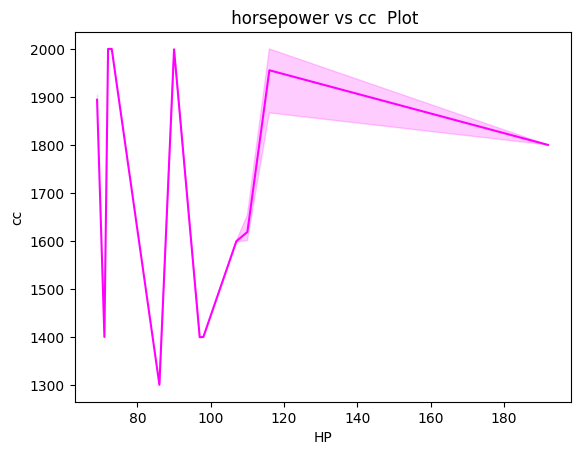

In [125]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')




plt.subplot(1, 3, 3)
plt.hist(df['KM'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Kilometers')
plt.xlabel('KM')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


sns.lineplot(x=df["HP"], y=df["cc"], color="magenta")
plt.title(" horsepower vs cc  Plot")
plt.show()


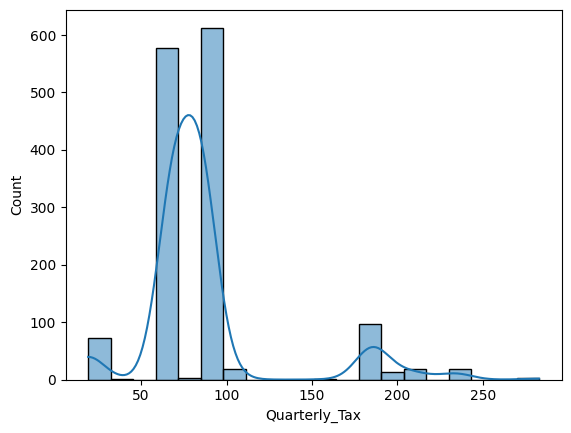

In [126]:
sns.histplot(df["Quarterly_Tax"], bins=20, kde=True)
plt.show()





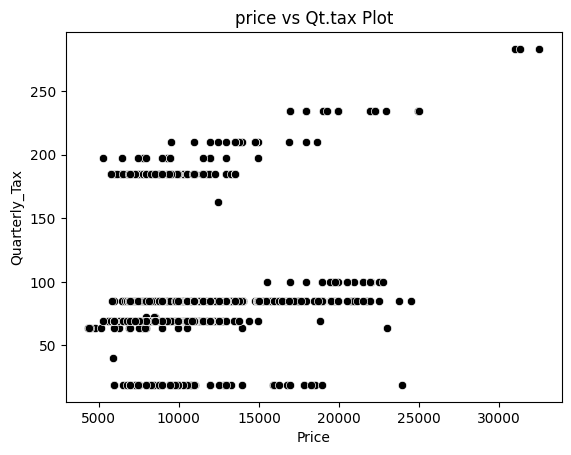

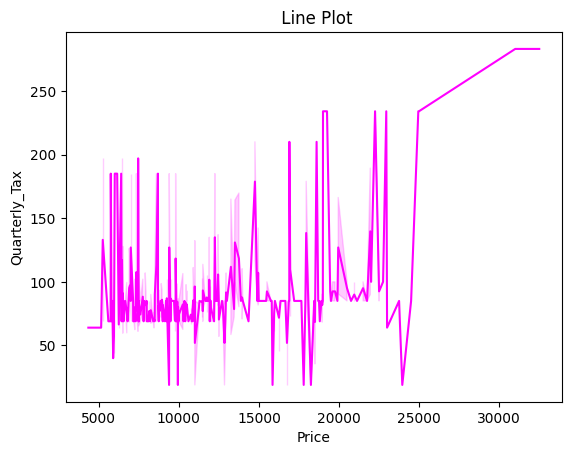

In [127]:
sns.scatterplot(x=df["Price"], y=df["Quarterly_Tax"], color="black")
plt.title("price vs Qt.tax Plot")
plt.show()

sns.lineplot(x=df["Price"], y=df["Quarterly_Tax"], color="magenta")
plt.title(" Line Plot")
plt.show()

<ipython-input-128-1a693431b74b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Automatic"], y=df["Price"], palette="coolwarm")


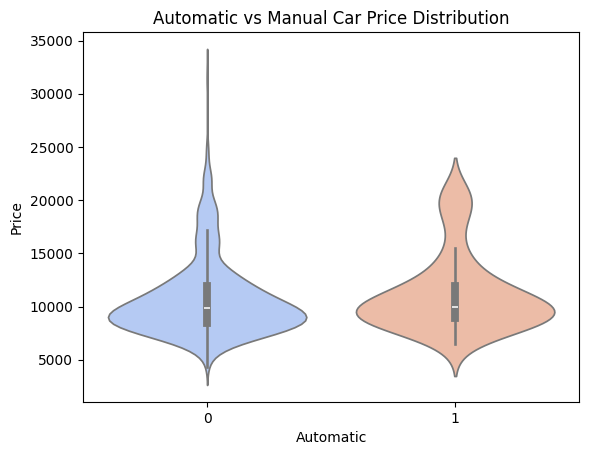

<ipython-input-128-1a693431b74b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Weight"], y=df["Quarterly_Tax"], palette="coolwarm")


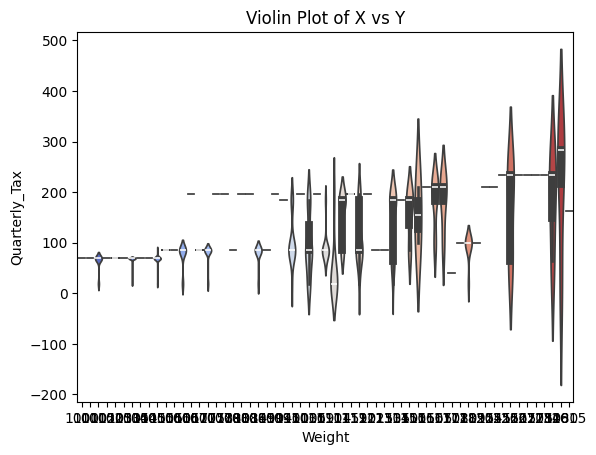

In [128]:
sns.violinplot(x=df["Automatic"], y=df["Price"], palette="coolwarm")
plt.title("Automatic vs Manual Car Price Distribution")
plt.show()





sns.violinplot(x=df["Weight"], y=df["Quarterly_Tax"], palette="coolwarm")
plt.title("Violin Plot of X vs Y")
plt.show()

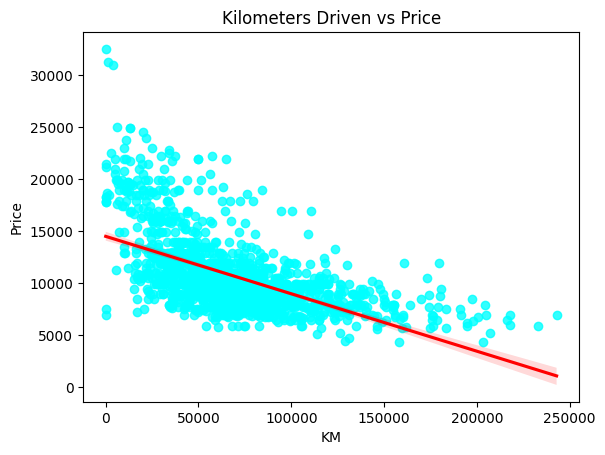

<ipython-input-129-4e2b6bc5b3b5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Fuel_Type"], y=df["Price"], palette="coolwarm")


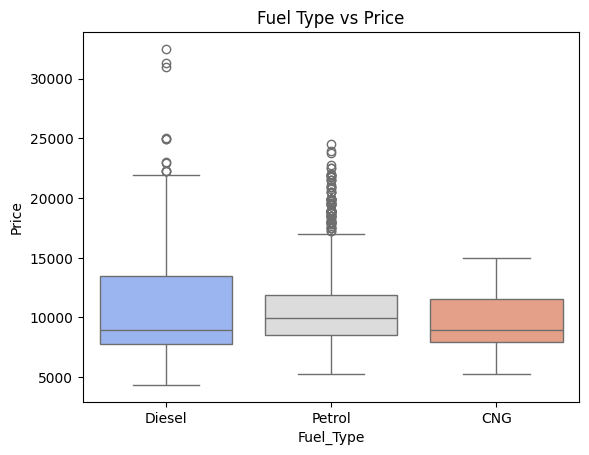

In [129]:
sns.regplot(x=df["KM"], y=df["Price"], scatter_kws={"color":"cyan"}, line_kws={"color":"red"})
plt.title("Kilometers Driven vs Price")
plt.show()




sns.boxplot(x=df["Fuel_Type"], y=df["Price"], palette="coolwarm")
plt.title("Fuel Type vs Price")
plt.show()



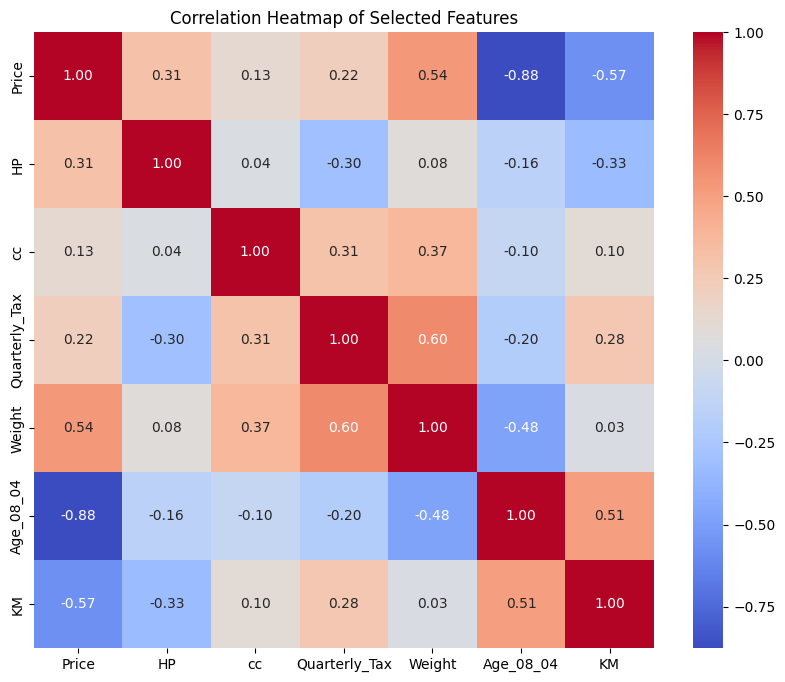

In [139]:
cols = ['Price', 'HP', 'cc', 'Quarterly_Tax', 'Weight', 'Age_08_04', 'KM']
correlation_matrix = df[cols].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()


Mean Absolute Error: 752.177673611111
R² Score: 0.9306258924599807


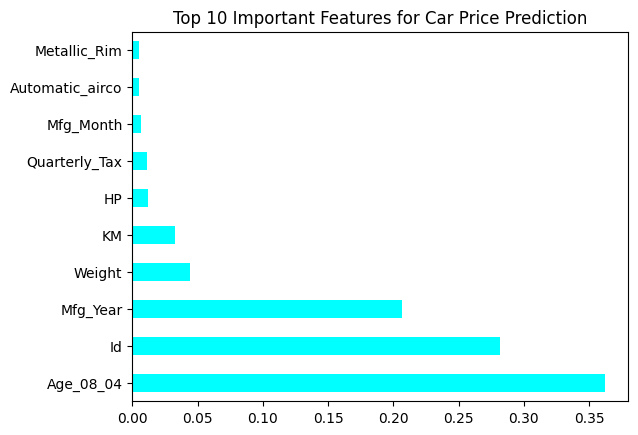

In [131]:
df = df.dropna()
df = pd.get_dummies(df, columns=["Fuel_Type", "Automatic"])
X = df.drop(columns=["Price", "Model"])
y = df["Price"]

# Spliting of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#pridicted by
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")
#as per feature
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='cyan')
plt.title("Top 10 Important Features for Car Price Prediction")
plt.show()

In [132]:
# checking for possible ouliner agar hai then operation perform karenge accordingly
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

columns_to_check = ['Price', 'HP', 'cc', 'Quarterly_Tax', 'Weight', 'KM']
for col in columns_to_check:
    outliers = detect_outliers_iqr(df[col])
    print(f"Outliers in {col}:\n{outliers}\n")


Outliers in Price:
7      18600
8      21500
10     20950
11     19950
12     19600
       ...  
182    21125
183    21500
184    17795
185    18245
523    18950
Name: Price, Length: 110, dtype: int64

Outliers in HP:
8      192
10     192
11     192
12     192
13     192
14     192
15     192
16     192
49     192
53     192
141    192
Name: HP, dtype: int64

Outliers in cc:
0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
1195    2000
1202    2000
1216    2000
1320    2000
1330    2000
Name: cc, Length: 123, dtype: int64

Outliers in Quarterly_Tax:
0       210
1       210
2       210
3       210
4       210
       ... 
1387     19
1388     19
1416     19
1423     19
1435     19
Name: Quarterly_Tax, Length: 224, dtype: int64

Outliers in Weight:
0       1165
1       1165
2       1165
3       1165
4       1170
        ... 
601     1260
654     1260
768     1155
960     1480
1044    1172
Name: Weight, Length: 66, dtype: int64

Outliers in KM:
186     243000


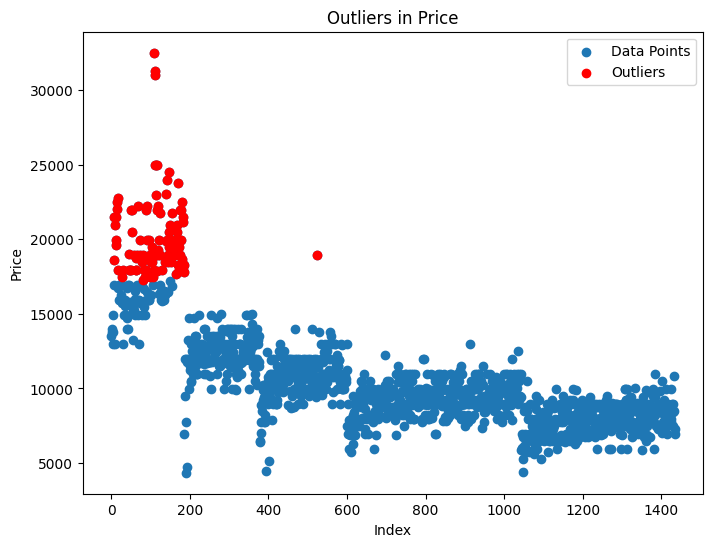

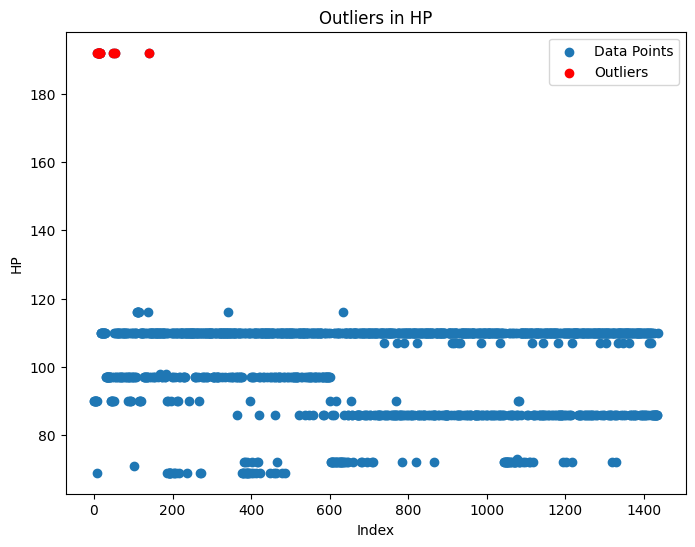

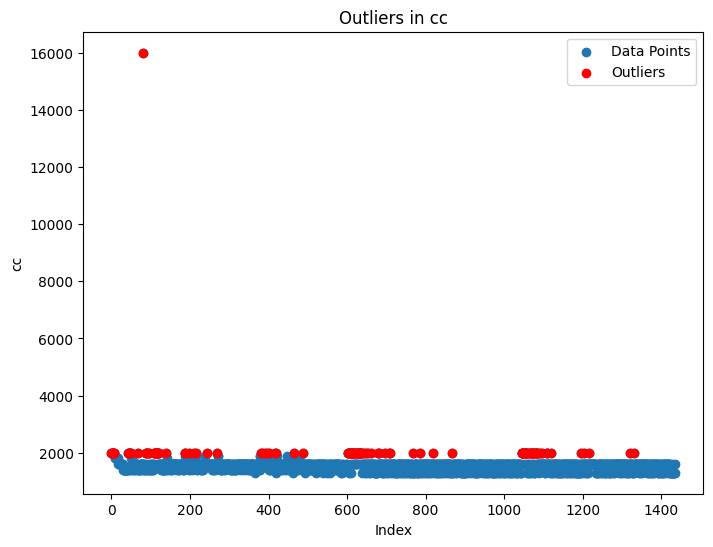

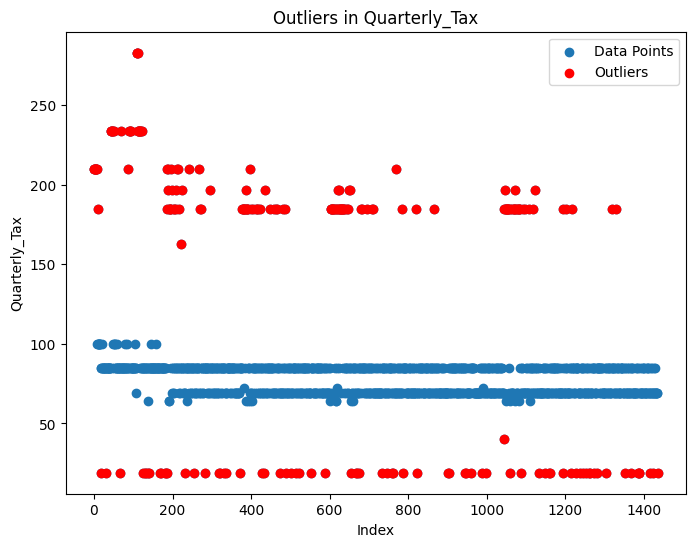

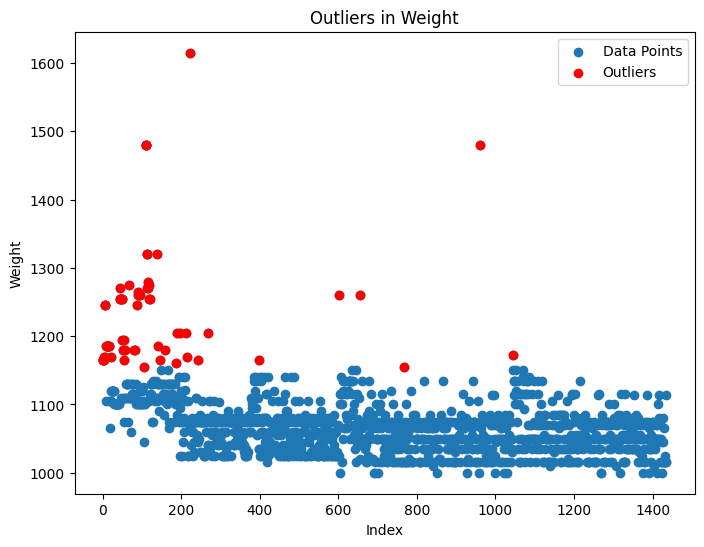

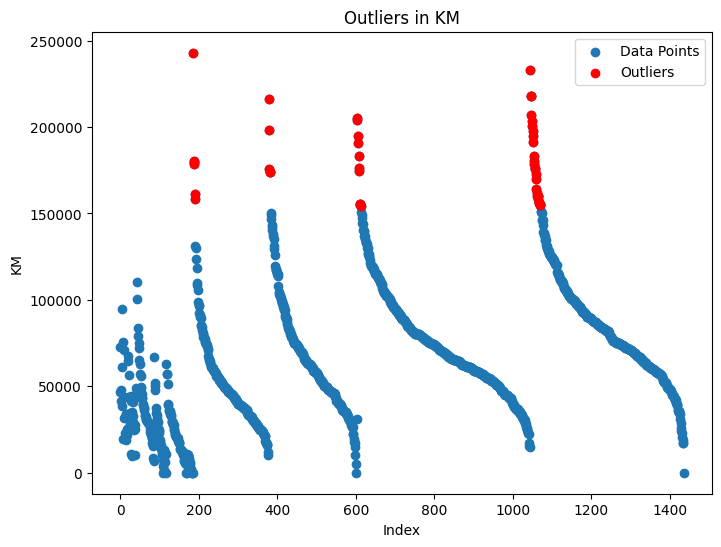

In [133]:
#outliners visualisation

for col in columns_to_check:
    outliers = detect_outliers_iqr(df[col])
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df[col], label='Data Points')
    plt.scatter(outliers.index, outliers, color='red', label='Outliers')
    plt.title(f'Outliers in {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    plt.show()


In [134]:

df['Price_zscore'] = (df['Price'] - df['Price'].mean()) / df['Price'].std()
threshold = 3
df['Price_zsquare'] = np.where(np.abs(df['Price_zscore']) > threshold, np.nan, df['Price'])

error_zsquare = np.mean((df['Price'] - df['Price_zsquare']) ** 2)
print(f"Error after z-square method: {error_zsquare}")

print(f"Number of outliers removed: {df['Price'].isnull().sum()}")
print(f"Mean of original Price: {df['Price'].mean()}")
print(f"Mean of Price after z-square: {df['Price_zsquare'].mean()}")


Error after z-square method: 0.0
Number of outliers removed: 0
Mean of original Price: 10730.824512534818
Mean of Price after z-square: 10489.325531914894


In [135]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

columns_to_check = ['KM']

for col in columns_to_check:
    outliers = detect_outliers_iqr(df[col])
    print(f"Outliers in {col}:\n{outliers}\n")


    extreme_outliers = outliers[outliers > df[col].quantile(0.99)]

    if not extreme_outliers.empty:
      print(f"Extreme outliers in {col}:\n{extreme_outliers}\n")
      for outlier_index in extreme_outliers.index:
        if col == 'KM':
            print(f"Model with high KM ({df.loc[outlier_index, 'KM']}): {df.loc[outlier_index, 'Model']}")
            if df.loc[outlier_index, 'KM'] > 100000:
              print(f"Model '{df.loc[outlier_index, 'Model']}' is a possible best car due to high mileage.")


Outliers in KM:
186     243000
187     180638
188     179860
189     178858
190     161000
191     158320
378     216000
379     198167
380     176000
381     174139
382     174000
603     205000
604     204250
605     194545
606     190900
607     183500
608     176184
609     174833
610     155720
611     155500
612     154783
613     154462
1044    232940
1045    218118
1046    217764
1047    207114
1048    203254
1049    200732
1050    197501
1051    194765
1052    191620
1053    183277
1054    180378
1055    178800
1056    176177
1057    176000
1058    172980
1059    170000
1060    164000
1061    161775
1062    160000
1063    159968
1064    159908
1065    158492
1066    156204
1067    156169
1068    155210
1069    155000
1070    154900
Name: KM, dtype: int64

Extreme outliers in KM:
186     243000
378     216000
379     198167
603     205000
604     204250
605     194545
1044    232940
1045    218118
1046    217764
1047    207114
1048    203254
1049    200732
1050    197501
1051  

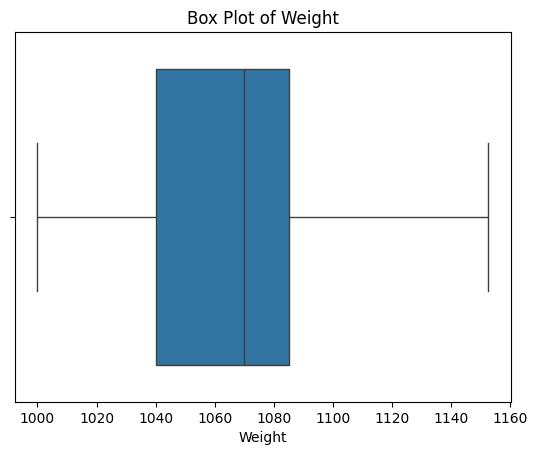

 now corrected one


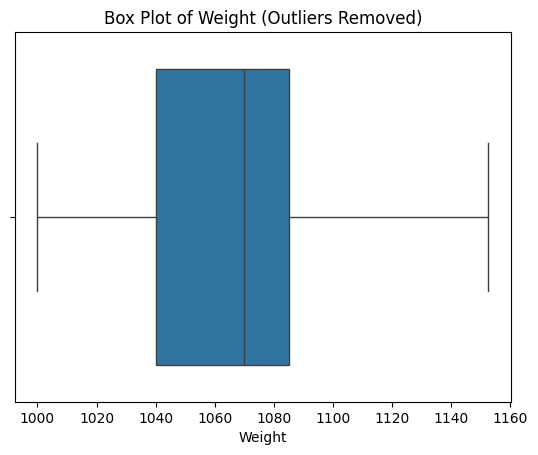

In [141]:

sns.boxplot(x=df["Weight"])
plt.title("Box Plot of Weight")
plt.show()

print(" now corrected one")
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    data_no_outliers = data.apply(lambda x: upper_bound if x > upper_bound else x)
    return data_no_outliers

df["Weight"] = remove_outliers_iqr(df['Weight'])

sns.boxplot(x=df["Weight"])
plt.title("Box Plot of Weight (Outliers Removed)")
plt.show()

